<a href="https://colab.research.google.com/github/RioSatriatama/Basic-Swarm-Intelligence/blob/main/Swarm_Intelligence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This simple project / simple case study was created by:

Name: Fransiskus Xaverius Prasetyo Satriatama (Rio)

Email: riosatriatama0801@gmail.com

Github: RioSatriatama

Thank You 😁

# Basic Swarm Intelligence

# Algoritma Swarm Intelligence dalam Pengolahan Data

Dalam dunia big data dan analisis data, algoritma Swarm Intelligence itu jadi senjata ampuh buat nemuin pola-pola tersembunyi yang susah banget dicerna pake cara tradisional. Misalnya aja, ada algoritma kayak Particle Swarm Optimization (PSO) yang dipake buat cari solusi optimal di dalam ruang data yang super besar. PSO ini nggak cuma ngandelin satu solusi aja, tapi ngeksplorasi banyak solusi potensial dan terus memperbaikinya secara berulang-ulang, mirip banget kayak semut yang terus-terusan cari jalan terbaik buat menuju makanan.

Metode Swarm Intelligence kayak gini memungkinkan sistem buat bergerak dinamis, kayak semut yang bisa ngikutin jejak temennya buat nemuin sumber makanan. Dalam big data, ini penting banget karena data yang ada tuh gede banget dan rumit. Tanpa bantuan teknologi kayak gini, mencari pola yang bener-bener berguna dalam data jadi jauh lebih susah. Sistem ini bisa ngeksplorasi banyak kemungkinan dan bahkan menemukan solusi yang nggak pernah kepikiran sebelumnya.

PSO dan algoritma sejenisnya juga bekerja dengan cara iteratif, jadi mereka terus mencari solusi yang lebih baik seiring waktu. Semakin banyak langkah yang diambil, semakin dekat sistem ke solusi terbaik. Ini bikin algoritma Swarm Intelligence sangat efisien dalam memproses data yang besar dan kompleks, dan bisa nyari solusi yang tepat di waktu yang lebih singkat.

Bahkan, konsep ini juga diterapin dalam berbagai bidang, mulai dari pencarian solusi dalam optimisasi sampai pemrosesan bahasa alami dan prediksi pasar. Jadi, dengan Swarm Intelligence, sistem bisa lebih cerdas dalam menghadapi masalah besar, yang biasanya bakal susah diatasi pakai metode lama. Hal ini juga bikin proses analisis data jadi lebih cepat dan akurat.

Di ilmu computer atau teknologi informasi, algoritma ini merupakan topik-topik di mata kuliah kecerdasan buatan atau Artificial Intelligence (AI). Algoritma ini secara umum digunakan untuk memecahkan persoalan optimisasi. Penelitian tentang algoritma sampai saat ini terus berkembang.

Modifikasi algoritma tersebut maupun hybrid dengan algoritma lain juga terus berkembang untuk memecahkan persoalan optimisasi yang terus berkembang sampai saat ini.

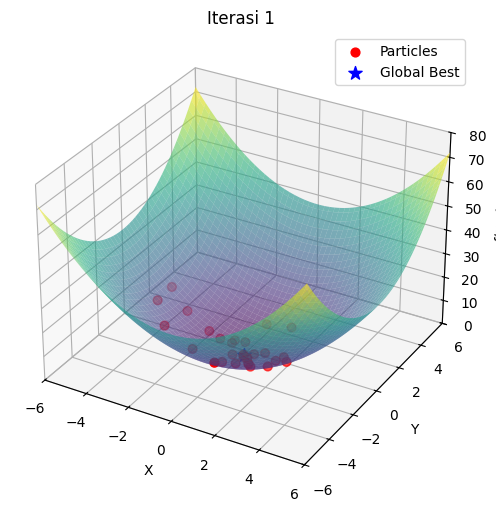

In [ ]:
# --- PSO dengan Animasi 3D ---
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Fungsi yang ingin dioptimasi (Sphere Function)
def sphere_function(position):
    x, y = position
    return x**2 + y**2

# Inisialisasi parameter PSO
num_particles = 30
num_dimensions = 2
max_iter = 30
w, c1, c2 = 0.7, 1.5, 1.5

# Inisialisasi posisi & kecepatan partikel
particles = np.random.uniform(-6, 6, (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))

# Menyimpan posisi terbaik tiap partikel
personal_best_positions = np.copy(particles)
personal_best_values = np.array([sphere_function(p) for p in particles])

# Menyimpan posisi terbaik global
global_best_index = np.argmin(personal_best_values)
global_best_position = personal_best_positions[global_best_index]
global_best_value = personal_best_values[global_best_index]

# Data history partikel untuk animasi
particles_history = []

# Iterasi PSO & simpan posisi partikel di tiap iterasi
for t in range(max_iter):
    for i in range(num_particles):
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i]
                         + c1 * r1 * (personal_best_positions[i] - particles[i])
                         + c2 * r2 * (global_best_position - particles[i]))
        particles[i] += velocities[i]

        value = sphere_function(particles[i])
        if value < personal_best_values[i]:
            personal_best_positions[i] = particles[i]
            personal_best_values[i] = value

        if value < global_best_value:
            global_best_position = particles[i]
            global_best_value = value

    particles_history.append((particles.copy(), global_best_position.copy(), global_best_value))

# --- Visualisasi Surface ---
x = np.linspace(-6, 6, 100)
y = np.linspace(-6, 6, 100)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

# Buat figure untuk animasi
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap="viridis", alpha=0.6)

# Scatter awal
scat = ax.scatter([], [], [], color="red", s=40, label="Particles")
best_point = ax.scatter([], [], [], color="blue", s=100, marker="*", label="Global Best")

ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_zlim(0, 80)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("f(x,y)")
ax.set_title("Animasi PSO pada Fungsi Sphere")
ax.legend()

# Fungsi update untuk animasi
def update(frame):
    particle_pos, gbest_pos, gbest_val = particles_history[frame]
    scat._offsets3d = (particle_pos[:,0], particle_pos[:,1], [sphere_function(p) for p in particle_pos])
    best_point._offsets3d = ([gbest_pos[0]], [gbest_pos[1]], [gbest_val])
    ax.set_title(f"Iterasi {frame+1}")
    return scat, best_point

# Buat animasi
ani = FuncAnimation(fig, update, frames=len(particles_history), interval=500, blit=False)

# Tampilkan di notebook Google Colab
HTML(ani.to_jshtml())


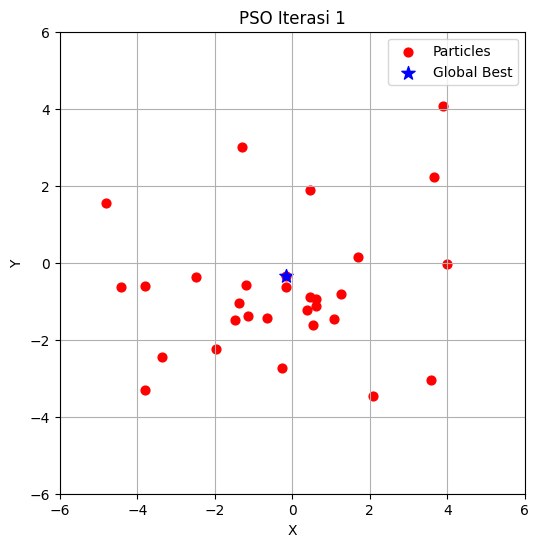

In [ ]:
# --- Particle Swarm Optimization (PSO) dengan Animasi 2D (Top View) ---
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Fungsi objektif: Sphere Function (minimum di (0,0))
def sphere_function(position):
    x, y = position
    return x**2 + y**2

# Parameter PSO
num_particles = 30
num_dimensions = 2
max_iter = 40
w, c1, c2 = 0.7, 1.5, 1.5

# Inisialisasi posisi & kecepatan partikel
particles = np.random.uniform(-6, 6, (num_particles, num_dimensions))
velocities = np.random.uniform(-1, 1, (num_particles, num_dimensions))

# Menyimpan personal best
personal_best_positions = np.copy(particles)
personal_best_values = np.array([sphere_function(p) for p in particles])

# Menyimpan global best
global_best_index = np.argmin(personal_best_values)
global_best_position = personal_best_positions[global_best_index]
global_best_value = personal_best_values[global_best_index]

# Riwayat untuk animasi
particles_history = []

# Iterasi PSO
for t in range(max_iter):
    for i in range(num_particles):
        r1, r2 = np.random.rand(), np.random.rand()
        velocities[i] = (w * velocities[i]
                         + c1 * r1 * (personal_best_positions[i] - particles[i])
                         + c2 * r2 * (global_best_position - particles[i]))
        particles[i] += velocities[i]

        # Evaluasi
        value = sphere_function(particles[i])
        if value < personal_best_values[i]:
            personal_best_positions[i] = particles[i]
            personal_best_values[i] = value

        if value < global_best_value:
            global_best_position = particles[i]
            global_best_value = value

    # Simpan posisi partikel & global best
    particles_history.append((particles.copy(), global_best_position.copy()))

# --- Visualisasi 2D ---
fig, ax = plt.subplots(figsize=(6,6))
ax.set_xlim(-6, 6)
ax.set_ylim(-6, 6)
ax.set_title("Animasi PSO (Top View)")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.grid(True)

# Scatter awal
scat = ax.scatter([], [], color="red", s=40, label="Particles")
best_point = ax.scatter([], [], color="blue", s=100, marker="*", label="Global Best")
ax.legend()

# Update animasi
def update(frame):
    particle_pos, gbest_pos = particles_history[frame]
    scat.set_offsets(particle_pos)
    best_point.set_offsets([gbest_pos[0], gbest_pos[1]])
    ax.set_title(f"PSO Iterasi {frame+1}")
    return scat, best_point

# Buat animasi
ani = FuncAnimation(fig, update, frames=len(particles_history), interval=400, blit=False)

# Tampilkan animasi di Google Colab
HTML(ani.to_jshtml())

Referensi :

M. Dorigo, V. Maniezzo, and A. Colorni, “Ant system: optimization by a colony of cooperating agents,” IEEE Transactions on Systems, Man, and Cybernetics – Part B, vol. 26, pp. 29-41, 1996.

https://mti.binus.ac.id/2015/04/07/kecerdasan-berkoloni-swarm-intelligence/

https://www.igi-global.com/

https://www.springer.com/gp